# SETUP DATASET

In [1]:
import pandas as pd

In [2]:
data_indikator_diabetes = pd.read_csv("DATASET/sample_data_proportional.csv")

In [3]:
data_indikator_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                10000 non-null  float64
 1   HighChol              10000 non-null  float64
 2   CholCheck             10000 non-null  float64
 3   BMI                   10000 non-null  float64
 4   Smoker                10000 non-null  float64
 5   Stroke                10000 non-null  float64
 6   HeartDiseaseorAttack  10000 non-null  float64
 7   PhysActivity          10000 non-null  float64
 8   Fruits                10000 non-null  float64
 9   Veggies               10000 non-null  float64
 10  HvyAlcoholConsump     10000 non-null  float64
 11  AnyHealthcare         10000 non-null  float64
 12  NoDocbcCost           10000 non-null  float64
 13  GenHlth               10000 non-null  float64
 14  MentHlth              10000 non-null  float64
 15  PhysHlth            

In [4]:
data_indikator_diabetes['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    8471
1.0    1529
Name: count, dtype: int64

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import pickle

# NORMAL SVM

In [6]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [7]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Membuat pipeline untuk scaling dan model SVM
pipeline = SVC()

In [9]:
# Melatih model dengan data pelatihan
normal_svm = pipeline.fit(X_train, y_train)
normal_svm

SVC()

In [10]:
# Evaluasi model di data pengujian
y_pred = normal_svm.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.867
Classification report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1734
         1.0       0.00      0.00      0.00       266

    accuracy                           0.87      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.75      0.87      0.81      2000



c:\Users\proda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\proda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\proda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
# Cross-validation score
cross_val_scores = cross_val_score(normal_svm, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.8475 0.847  0.847  0.847  0.847 ]
Mean cross-validation score:  0.8471


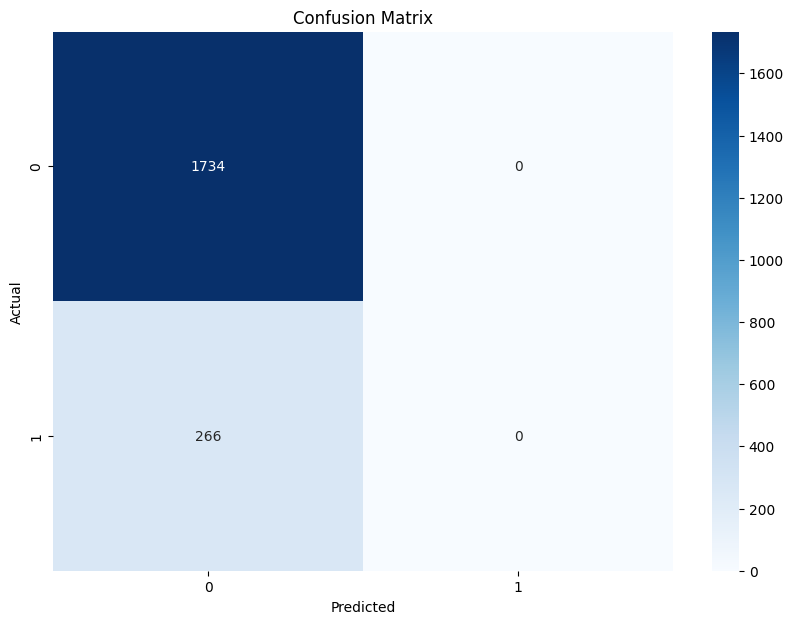

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(normal_svm, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

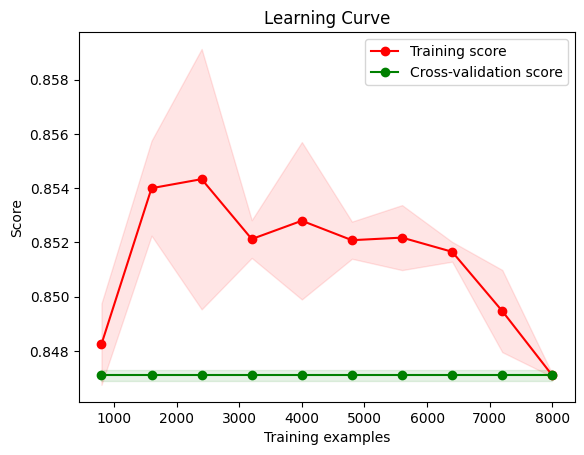

In [14]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [15]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/SVM/Normal_classification_results_SVM.csv', index=False)

# Simpan model ke file
with open('MODEL-RESULT/SVM/Normal_trained_model_SVM.pkl', 'wb') as file:
    pickle.dump(normal_svm, file)

# GRIDSEARCH SVM

In [16]:
data_indikator_diabetes = pd.read_csv("DATASET/sample_data_proportional.csv")

In [17]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [18]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
pipeline = SVC(probability=True)

In [20]:
# Define the parameter distribution
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly']
}

In [21]:
# Menggunakan GridSearchCV untuk mencari parameter terbaik
svm_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [22]:
# Menampilkan parameter terbaik
print("Best parameters found: ", svm_grid_search.best_params_)

Best parameters found:  {'C': 100, 'kernel': 'rbf'}


In [23]:
# Evaluasi model di data pengujian
y_pred = svm_grid_search.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.872
Classification report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1734
         1.0       0.71      0.06      0.12       266

    accuracy                           0.87      2000
   macro avg       0.79      0.53      0.52      2000
weighted avg       0.85      0.87      0.82      2000



In [24]:
# Cross-validation score
cross_val_scores = cross_val_score(svm_grid_search.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.8505 0.847  0.8455 0.8505 0.852 ]
Mean cross-validation score:  0.8491000000000002


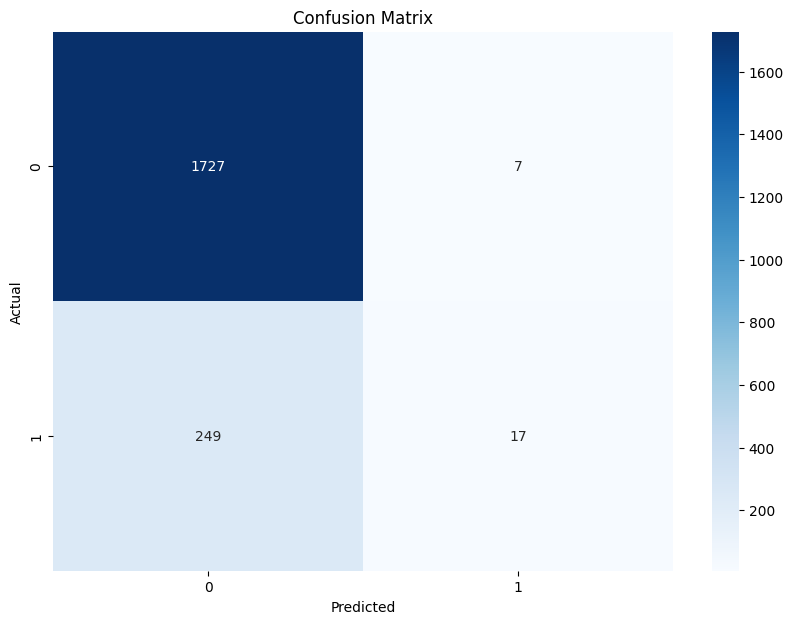

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(svm_grid_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

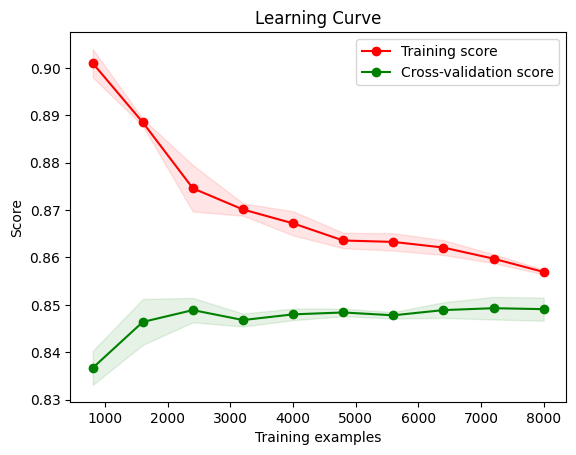

In [27]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [28]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/SVM/GridSearch_classification_results_SVMM.csv', index=False)

# Simpan model ke file
with open('MODEL-RESULT/SVM/GridSearch_trained_model_SVM.pkl', 'wb') as file:
    pickle.dump(svm_grid_search, file)

# RANDOMSEARCH SVM

In [6]:
data_indikator_diabetes = pd.read_csv("DATASET/sample_data_proportional.csv")

In [7]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [8]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
pipeline = SVC(probability=True)

In [10]:
# Define the parameter distribution
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly']
}

In [11]:
# Set up RandomizedSearchCV
svm_random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit to the data
svm_random_search.fit(X, y)
svm_random_search

RandomizedSearchCV(cv=5, estimator=SVC(probability=True),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42)

In [12]:
# Menampilkan parameter terbaik
print("Best parameters found: ", svm_random_search.best_params_)

Best parameters found:  {'kernel': 'poly', 'C': 100}


In [13]:
# Evaluasi model di data pengujian
y_pred = svm_random_search.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.8735
Classification report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1734
         1.0       0.81      0.06      0.12       266

    accuracy                           0.87      2000
   macro avg       0.84      0.53      0.53      2000
weighted avg       0.87      0.87      0.82      2000



In [14]:
# Cross-validation score
cross_val_scores = cross_val_score(svm_random_search.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.851  0.848  0.845  0.8505 0.852 ]
Mean cross-validation score:  0.8493


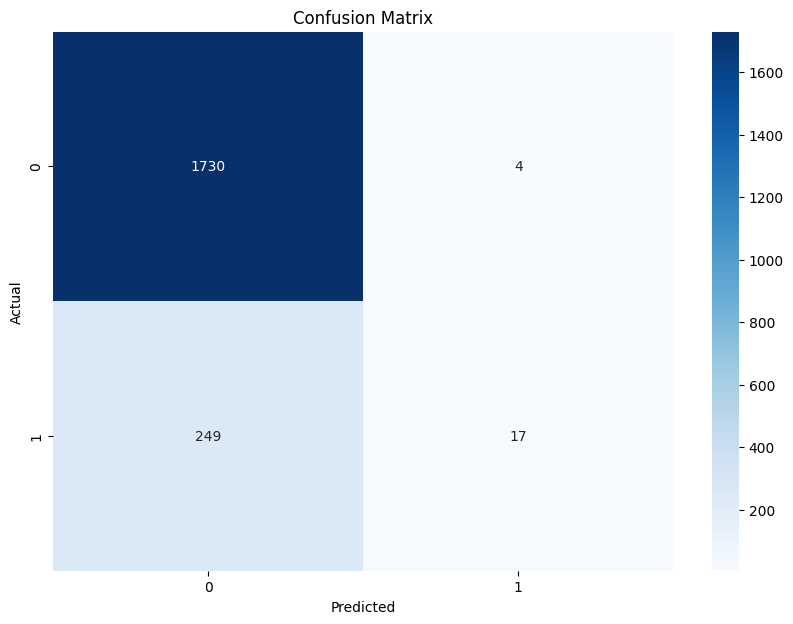

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(svm_random_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

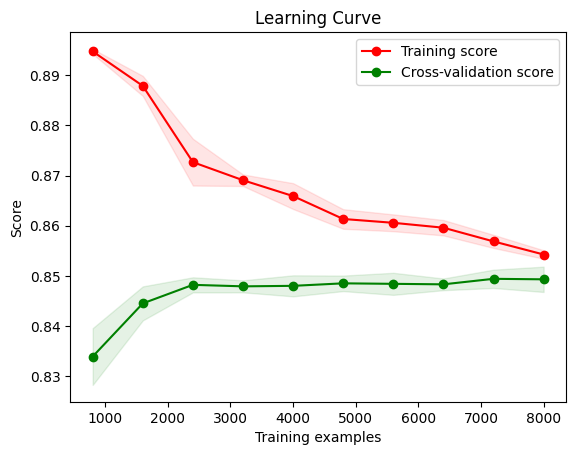

In [17]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [18]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/SVM/RandomSearch_classification_results_SVM.csv', index=False)

# Simpan model ke file
with open('MODEL-RESULT/SVM/RandomSearch_trained_model_SVM.pkl', 'wb') as file:
    pickle.dump(svm_random_search, file)